# Importing the reguired library for future engineering 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(20,10)

# Importing the clean dataset and converting it to a dataframe

In [2]:
df = pd.read_csv('clean.csv')
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


# Feature Engineering 

In [3]:
# determine the unit value in each categorical data
df.sex.unique()

array(['female', 'male'], dtype=object)

In [4]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [5]:
len(df.region.unique())

4

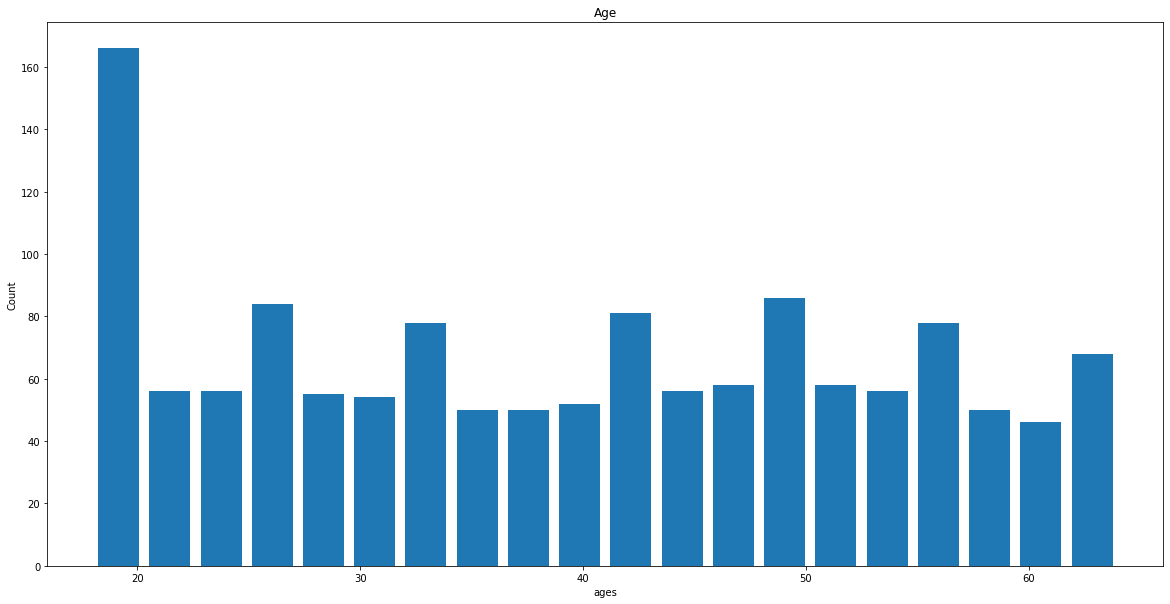

In [6]:
# Determine the distribution of numerical data using histograms
plt.hist(df.age, bins = 20, rwidth= 0.8)
plt.ylabel('Count')
plt.xlabel('ages')
plt.title('Age')
plt.show()

In [7]:
df.age.mean()

39.20702541106129

In [8]:
df['Age z-score'] = ((df.age) - (df.age.mean()))/df.age.std()
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,Age z-score
0,0,19,female,27.900,0,yes,southwest,16884.92400,-1.438227
1,1,18,male,33.770,1,no,southeast,1725.55230,-1.509401
2,2,28,male,33.000,3,no,southeast,4449.46200,-0.797655
3,3,33,male,22.705,0,no,northwest,21984.47061,-0.441782
4,4,32,male,28.880,0,no,northwest,3866.85520,-0.512957


In [9]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

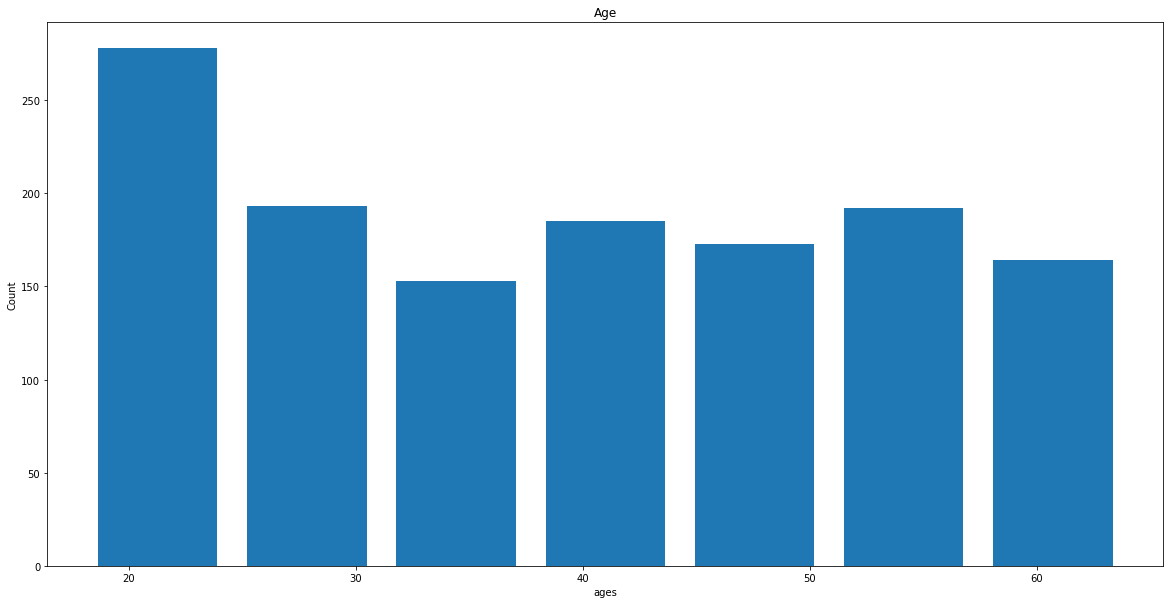

In [10]:
# Determine the distribution of numerical data using histograms
plt.hist(df.age, bins = 7, rwidth= 0.8)
plt.ylabel('Count')
plt.xlabel('ages')
plt.title('Age')
plt.show()

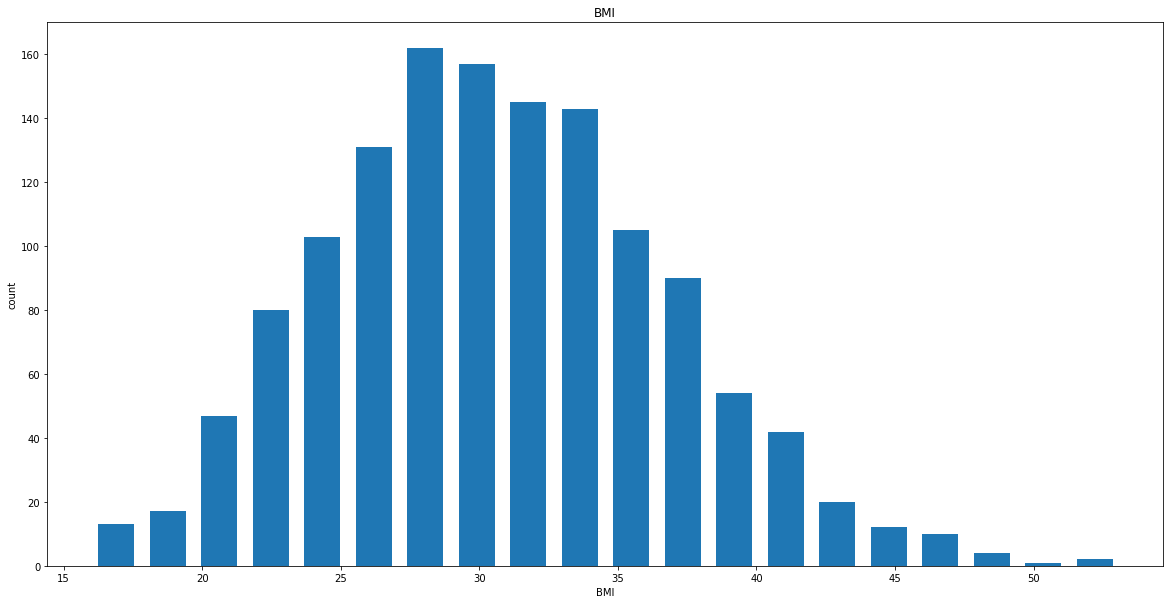

In [11]:
plt.hist(df.bmi, bins = 20, rwidth= 0.7)
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('count')
plt.show()

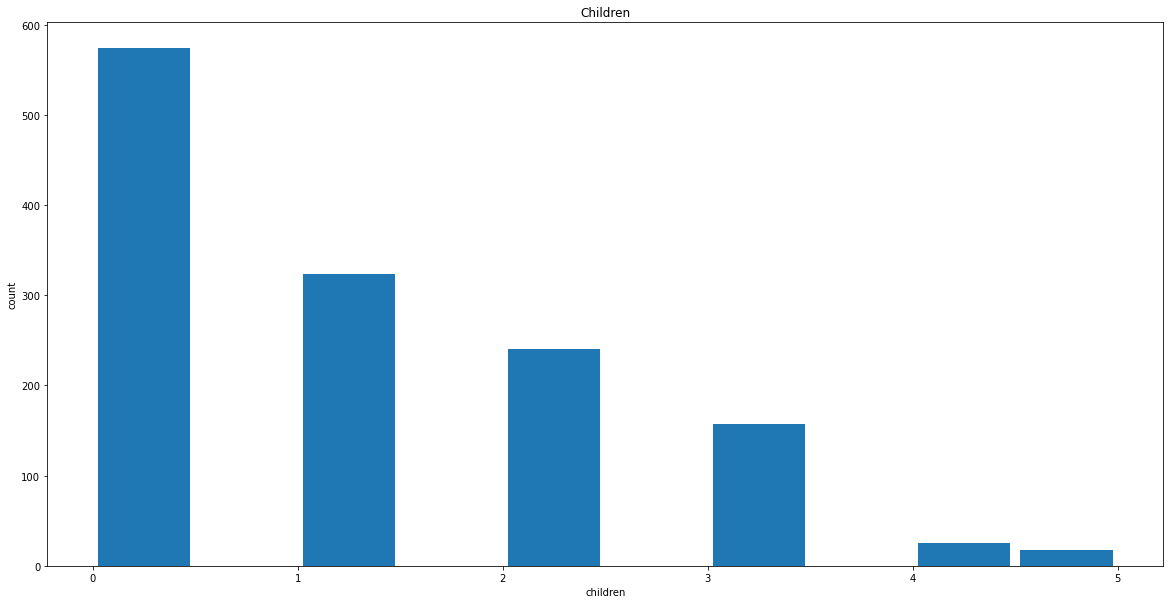

In [12]:
plt.hist(df.children, bins = 10, rwidth = 0.9)
plt.xlabel('children')
plt.ylabel('count')
plt.title('Children')
plt.show()

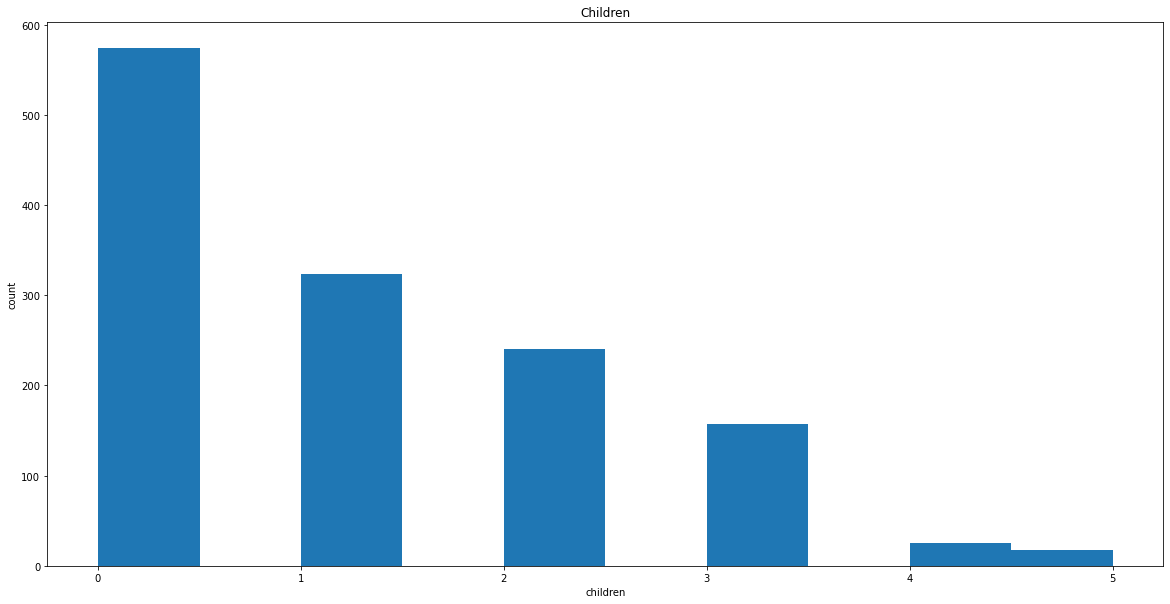

In [13]:
plt.hist(df.children)
plt.xlabel('children')
plt.ylabel('count')
plt.title('Children')
plt.show()

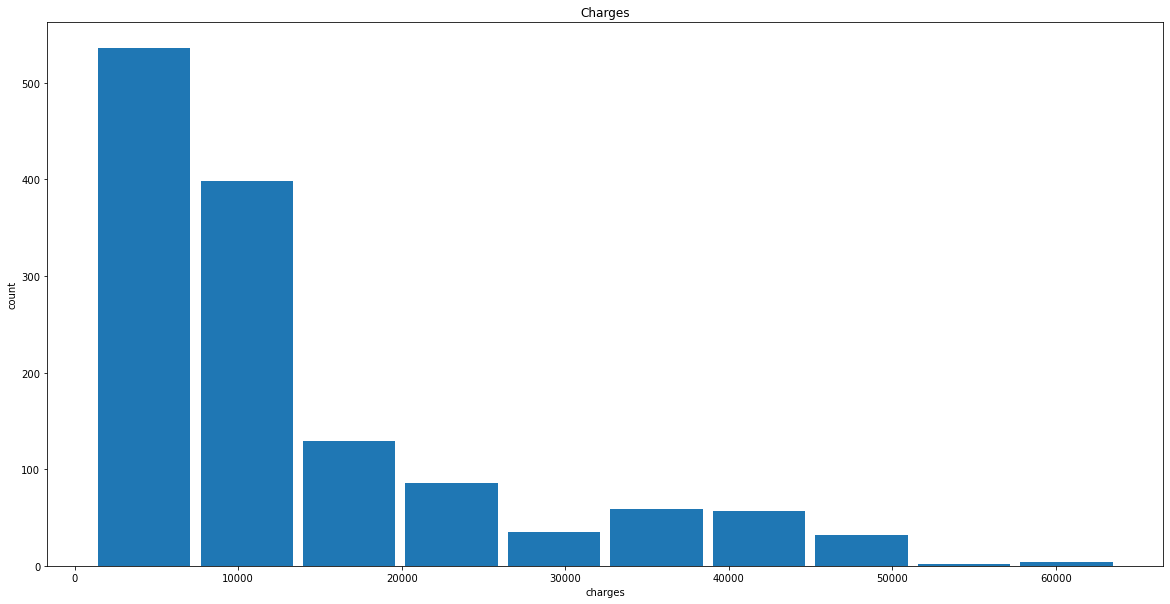

In [14]:
plt.hist(df.charges, bins = 10, rwidth = 0.9)
plt.xlabel('charges')
plt.ylabel('count')
plt.title('Charges')
plt.show()

In [17]:
# dropping the irrelevant columns
df.drop(['Age z-score', 'Unnamed: 0'], axis = "columns", inplace = True)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# One hot-econding

In [28]:
# Getting converting the sex categircal column to numbers
sexdum = pd.get_dummies(df.sex)

In [29]:
smodummies = pd.get_dummies(df.smoker)

In [30]:
regdummies = pd.get_dummies(df.region)

In [36]:
# concantinating the datasets 
comb = pd.concat([df, sexdum, smodummies, regdummies], axis = "columns")
comb.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [40]:
final = comb.drop(['sex', 'smoker', 'region', 'female', 'no', 'northeast'], axis = "columns")
final.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [41]:
final.to_csv("Modellingdata.csv")